In [191]:
import pandas as pd 
import numpy as np

#### Reading the Data & processing categoricals

In [192]:
train = pd.read_csv("../data/application_train.csv")
# Count the number of continuous and categorical predictors
num_features = train.select_dtypes(include='number').columns.tolist()
cat_features = train.select_dtypes(include='object').columns.tolist()

print(len(num_features), num_features)
print(len(cat_features), cat_features)

106 ['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', '

In [193]:
#drop all observations will null value
#justification: large datasize
print("train shape prior to dropping", train.shape)
display(train['TARGET'].value_counts(normalize=True))
print("="*50)

train = train.dropna()
print("train shape post dropping", train.shape)
display(train['TARGET'].value_counts(normalize=True))

train shape prior to dropping (307511, 122)


0    0.919271
1    0.080729
Name: TARGET, dtype: float64

train shape post dropping (8602, 122)


0    0.938851
1    0.061149
Name: TARGET, dtype: float64

In [194]:
# Get value counts for each categorical column
# non_bin_cat = []

for feature in cat_features:
    counts = train[feature].value_counts()
    print(f"Value counts for {feature}:")
    print(counts)
    unique_values = train[feature].nunique()

    # if unique_values > 2:  # Check if value counts > 2
    #   non_bin_cat.append(feature)

# print("NONBINARY CATEGORY COLUMNS", len(non_bin_cat), non_bin_cat)

Value counts for NAME_CONTRACT_TYPE:
Cash loans         7660
Revolving loans     942
Name: NAME_CONTRACT_TYPE, dtype: int64
Value counts for CODE_GENDER:
M    4381
F    4221
Name: CODE_GENDER, dtype: int64
Value counts for FLAG_OWN_CAR:
Y    8602
Name: FLAG_OWN_CAR, dtype: int64
Value counts for FLAG_OWN_REALTY:
Y    5916
N    2686
Name: FLAG_OWN_REALTY, dtype: int64
Value counts for NAME_TYPE_SUITE:
Unaccompanied      7174
Family              982
Spouse, partner     316
Children             63
Other_B              40
Other_A              19
Group of people       8
Name: NAME_TYPE_SUITE, dtype: int64
Value counts for NAME_INCOME_TYPE:
Working                 5050
Commercial associate    2836
State servant            716
Name: NAME_INCOME_TYPE, dtype: int64
Value counts for NAME_EDUCATION_TYPE:
Secondary / secondary special    4646
Higher education                 3523
Incomplete higher                 392
Lower secondary                    35
Academic degree                     6
Name:

### Feature Selection? 

In [195]:
train = train.drop(["SK_ID_CURR"], axis = 1)

In [196]:
train = pd.get_dummies(train)

 1. EXT_SOURCE_3                                       0.038209
 2. EXT_SOURCE_1                                       0.033258
 3. EXT_SOURCE_2                                       0.031795
 4. DAYS_REGISTRATION                                  0.021831
 5. DAYS_EMPLOYED                                      0.021334
 6. DAYS_BIRTH                                         0.020283
 7. DAYS_ID_PUBLISH                                    0.018592
 8. AMT_ANNUITY                                        0.018045
 9. AMT_CREDIT                                         0.017362
10. DAYS_LAST_PHONE_CHANGE                             0.016744
11. COMMONAREA_AVG                                     0.016021
12. LIVINGAREA_MEDI                                    0.015841
13. LANDAREA_MODE                                      0.015699
14. TOTALAREA_MODE                                     0.015228
15. COMMONAREA_MEDI                                    0.015151
16. AMT_GOODS_PRICE                     

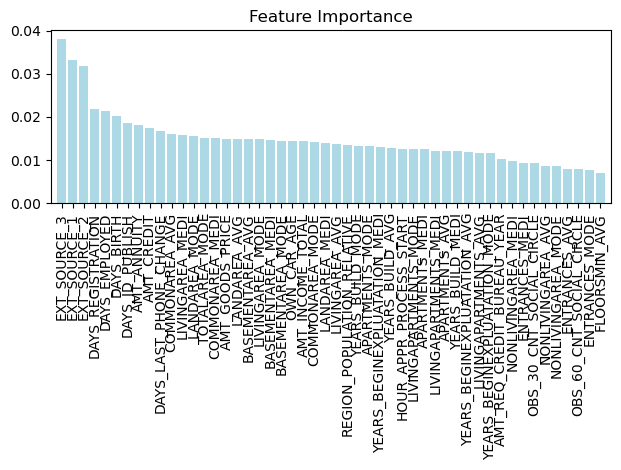

In [197]:
import matplotlib.pyplot as plt

y = train['TARGET']
X = train.drop("TARGET", axis = 1 )


from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler,OneHotEncoder, MinMaxScaler

rf = RandomForestClassifier(n_estimators=100,max_depth=None)
rf_pipe = Pipeline([('standardize', MinMaxScaler()), ('rf', rf)])
rf_pipe.fit(X, y)
feat_labels=X.columns
#根据随机森林模型的拟合结果选择特征
rf = rf_pipe.__getitem__('rf')
importance = rf.feature_importances_
 
#np.argsort()返回待排序集合从下到大的索引值，[::-1]实现倒序，即最终imp_result内保存的是从大到小的索引值
imp_result = np.argsort(importance)[::-1][:50]
 
#按重要性从高到低输出属性列名和其重要性
for i in range(len(imp_result)):
    print("%2d. %-*s %f" % (i + 1, 50, feat_labels[imp_result[i]], importance[imp_result[i]]))
 
#对属性列，按属性重要性从高到低进行排序
feat_labels = [feat_labels[i] for i in imp_result]
#绘制特征重要性图像
plt.title('Feature Importance')
plt.bar(range(len(imp_result)), importance[imp_result], color='lightblue', align='center')
plt.xticks(range(len(imp_result)), feat_labels, rotation=90)
plt.xlim([-1, len(imp_result)])
plt.tight_layout()
plt.show()

In [198]:
save_featLength = len(feat_labels)
X = X[feat_labels[:save_featLength]]
display(X.shape)

(8602, 50)

#### Train Test Split & Scaling

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [200]:
#stratfiy based on outcome variable due to data imabalance
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state = 22) 
print(X_train.shape, X_test.shape)

(6881, 50) (1721, 50)


In [201]:
scaler = MinMaxScaler(feature_range = (0, 1)).fit(X_train)
X_train = scaler.transform(X_train)
X_train=pd.DataFrame(X_train, columns=X.columns)

X_test = scaler.transform(X_test)
X_test=pd.DataFrame(X_test, columns=X.columns)

In [202]:
feature_names = X_train.columns.tolist()
print(len(feature_names), feature_names)

50 ['EXT_SOURCE_3', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'DAYS_BIRTH', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 'AMT_CREDIT', 'DAYS_LAST_PHONE_CHANGE', 'COMMONAREA_AVG', 'LIVINGAREA_MEDI', 'LANDAREA_MODE', 'TOTALAREA_MODE', 'COMMONAREA_MEDI', 'AMT_GOODS_PRICE', 'LANDAREA_AVG', 'BASEMENTAREA_AVG', 'LIVINGAREA_MODE', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_MODE', 'OWN_CAR_AGE', 'AMT_INCOME_TOTAL', 'COMMONAREA_MODE', 'LANDAREA_MEDI', 'LIVINGAREA_AVG', 'REGION_POPULATION_RELATIVE', 'YEARS_BUILD_MODE', 'APARTMENTS_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_AVG', 'HOUR_APPR_PROCESS_START', 'LIVINGAPARTMENTS_MODE', 'APARTMENTS_MEDI', 'LIVINGAPARTMENTS_MEDI', 'APARTMENTS_AVG', 'YEARS_BUILD_MEDI', 'YEARS_BEGINEXPLUATATION_AVG', 'LIVINGAPARTMENTS_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'NONLIVINGAREA_MEDI', 'ENTRANCES_MEDI', 'OBS_30_CNT_SOCIAL_CIRCLE', 'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'ENTRANCES_AVG', 'OBS_60_CNT_SOCIAL_CIRCLE',

In [203]:
y_train.value_counts(normalize=True)

0    0.938817
1    0.061183
Name: TARGET, dtype: float64

## Gradient Boost
- decided to use lightgbm due to its computational power
- Reference: https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html

In [208]:
import lightgbm as lgb

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score

#### Default Model

In [217]:
display(X_train.head())
display(y_train)

,EXT_SOURCE_3,EXT_SOURCE_1,EXT_SOURCE_2,DAYS_REGISTRATION,DAYS_EMPLOYED,DAYS_BIRTH,DAYS_ID_PUBLISH,AMT_ANNUITY,AMT_CREDIT,DAYS_LAST_PHONE_CHANGE,...,AMT_REQ_CREDIT_BUREAU_YEAR,NONLIVINGAREA_MEDI,ENTRANCES_MEDI,OBS_30_CNT_SOCIAL_CIRCLE,NONLIVINGAREA_AVG,NONLIVINGAREA_MODE,ENTRANCES_AVG,OBS_60_CNT_SOCIAL_CIRCLE,ENTRANCES_MODE,FLOORSMIN_AVG
0,0.378409,0.737304,0.291721,0.702084,0.921887,0.788610,0.611430,0.153630,0.171910,0.676686,...,0.058824,0.0222,0.1379,0.000000,0.0217,0.0230,0.1379,0.000000,0.1379,0.0417
1,0.080852,0.290731,0.690874,0.989520,0.992056,0.842056,0.571201,0.024569,0.033708,0.881965,...,0.058824,0.0050,0.2414,0.000000,0.0049,0.0052,0.2414,0.000000,0.2414,0.3750
2,0.543288,0.614367,0.982729,0.810200,0.983346,0.584988,0.274745,0.085249,0.129211,0.551075,...,0.176471,0.0446,0.2069,0.000000,0.0437,0.0463,0.2069,0.000000,0.2069,0.2083
3,0.695121,0.246448,0.757727,0.919248,0.882029,0.905900,0.681833,0.102217,0.071137,1.000000,...,0.058824,0.0000,0.2241,0.037037,0.0000,0.0000,0.2241,0.037037,0.1379,0.2917
4,0.655515,0.398616,0.613927,0.903586,0.884050,0.806717,0.417465,0.062692,0.102247,0.945259,...,0.000000,0.0353,0.1379,0.074074,0.0346,0.0366,0.1379,0.074074,0.1379,0.3750


212160    0
1001      0
217758    0
107163    0
157374    0
         ..
285975    0
263158    0
104663    1
154408    0
32783     0
Name: TARGET, Length: 6881, dtype: int64

In [230]:
#a lgb dataset
lgb_train = lgb.Dataset(X_train, y_train)

#BASE MODEL 
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': {'binary_logloss', 'auc'},
    'num_leaves': 35,
    'learning_rate': 0.08,
    'feature_fraction': 1,
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'verbose': 0,
}
# 使用交叉验证进行模型评估
folds = 5
kf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=22)

val_list = []

for train_index, val_index  in kf.split(X_train, y_train):
  train_X = X_train.iloc[train_index]
  val_X = X_train.iloc[val_index]
  train_y = y_train.iloc[train_index]
  val_y = y_train.iloc[val_index]

  lgb_train = lgb.Dataset(train_X, train_y)
  lgb_eval = lgb.Dataset(val_X, val_y, reference=lgb_train)

  res = {}

  gbm = lgb.train(params,
                  lgb_train,
                  num_boost_round=30,
                  valid_sets=lgb_eval,
                  valid_names=['valid'],
                  evals_result = res,
                  early_stopping_rounds=5)
  y_pred = gbm.predict(val_X, num_iteration=gbm.best_iteration)
  val_scores.append(res['valid']['auc'][-1])

print("avg_val_score: %4f" % (np.mean(val_scores)))


/Users/juliachu/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/juliachu/opt/anaconda3/lib/python3.9/site-packages/lightgbm/engine.py:260: UserWarning: 'evals_result' argument is deprecated and will be removed in a future release of LightGBM. Pass 'record_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'evals_result' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_col_wise=true` to remove the overhead.
[1]	valid's binary_logloss: 0.228615	valid's auc: 0.64939
Training until validation scores don't improve for 5 rounds
[2]	valid's binary_logloss: 0.225116	valid's auc: 0.683887
[3]	valid's binary_logloss: 0.223366	valid's auc: 0.691331
[4]	valid's binary_logloss: 0.220625	valid's auc: 0.701557
[5]	valid's binary_logloss: 0.219259	valid's auc: 0.69974
[6]	valid's binary_logloss: 0.217535	valid's auc: 0.709616
[7]	valid's binary_logloss: 0.216916	valid's auc: 0.706702
[8]	valid's binary_logloss: 0.216292	valid's auc: 0.702677
[9]	valid's binary_logloss: 0.216709	valid's auc: 0.70122
[10]	valid's binary_logloss: 0.216872	valid's auc: 0.697601
[11]	valid's binary_logloss: 0.217144	valid's auc: 0.693571
Early stopping, best iteration is:
[6]	valid's binary_logloss: 0.217535	valid's auc: 0.709616
[LightGBM] [Warning] Auto-choosin

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_col_wise=true` to remove the overhead.


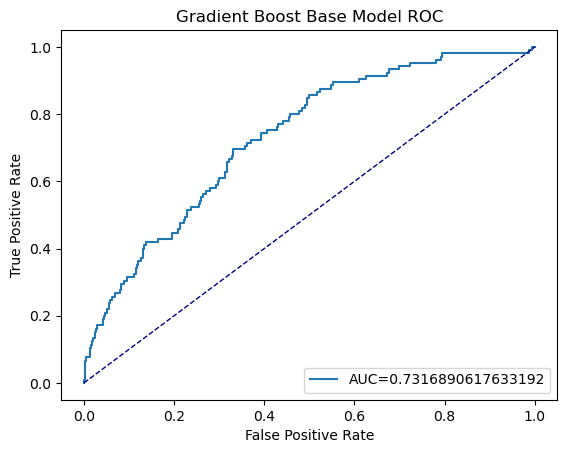

In [234]:
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=30)
# 对测试集进行预测
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred)
auc = metrics.roc_auc_score(y_test, y_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title("Gradient Boost Base Model ROC")
plt.show()